In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_637035/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
path = pd.read_csv("path.csv")
path = path.drop('Unnamed: 0',axis=1)
path = path.rename(columns={"0":"lr","1":"bs"})

In [3]:
path.max()

lr    0.649125
bs    0.999765
dtype: float64

In [4]:
path.min()

lr   -0.297449
bs    0.045865
dtype: float64

In [5]:
zoom_0 = pd.read_csv("sweep_data_0.csv")
zoom_1 = pd.read_csv("sweep_data_1.csv")
zoom_2 = pd.read_csv("sweep_data_2.csv")
zoom_3 = pd.read_csv("sweep_data_3.csv")

In [6]:
zoom_0.head()

,Unnamed: 0,lr,bs,ep_r
0,0,-1.0,0.0,-239.045947
1,1,-1.0,0.1,-227.349431
2,2,-1.0,0.2,-243.692654
3,3,-1.0,0.3,-225.691045
4,4,-1.0,0.4,-194.420336


In [7]:
zoom_1.head()

,Unnamed: 0,lr,bs,ep_r
0,0,0.0,0.00,-0.996452
1,1,0.0,0.04,-0.996393
2,2,0.0,0.08,-0.996404
3,3,0.0,0.12,-0.996466
4,4,0.0,0.16,-0.996472


In [8]:
zoom = pd.concat((zoom_0,zoom_1,zoom_2,zoom_3))

In [9]:
zoom.head()

,Unnamed: 0,lr,bs,ep_r
0,0,-1.0,0.0,-239.045947
1,1,-1.0,0.1,-227.349431
2,2,-1.0,0.2,-243.692654
3,3,-1.0,0.3,-225.691045
4,4,-1.0,0.4,-194.420336


In [10]:
zoom = zoom.drop(['Unnamed: 0'],axis=1)
zoom.head()

,lr,bs,ep_r
0,-1.0,0.0,-239.045947
1,-1.0,0.1,-227.349431
2,-1.0,0.2,-243.692654
3,-1.0,0.3,-225.691045
4,-1.0,0.4,-194.420336


In [11]:
zoom_mean = zoom.groupby(['lr','bs'], as_index=False).mean()
zoom_mean.head()

,lr,bs,ep_r
0,-1.0,0.0,-239.045947
1,-1.0,0.1,-227.349431
2,-1.0,0.2,-243.692654
3,-1.0,0.3,-225.691045
4,-1.0,0.4,-194.420336


In [12]:
zoom_mean.duplicated(['lr','bs']).any()

False

In [13]:
import numpy as np
from scipy.interpolate import griddata

In [14]:
df = zoom_0
# x1 = np.arange(-1,1,0.04)
# y1 = np.arange(0,1,0.04)
x1 = np.linspace(zoom_mean['lr'].min(),zoom_mean['lr'].max(),512)
y1 = np.linspace(zoom_mean['bs'].min(),zoom_mean['bs'].max(),512)
x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
z2 = griddata((zoom_mean['lr'], zoom_mean['bs']), zoom_mean['ep_r'], (x2, y2), method='cubic')

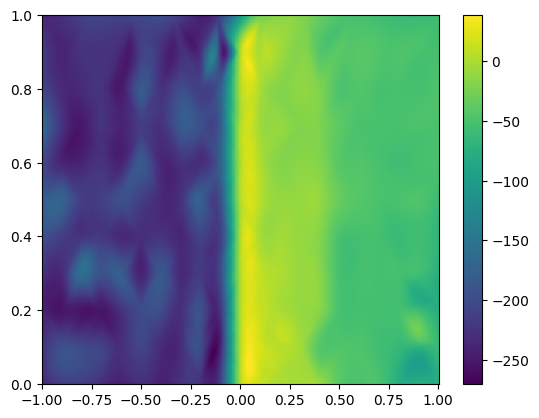

In [15]:
fig, ax = plt.subplots()

im = ax.pcolormesh(x2, y2, z2, cmap='viridis')
# ax.set_xlim([-1,.9])
# ax.set_ylim([0,.9])
fig.colorbar(im, ax=ax)
plt.show()

In [16]:
from matplotlib.path import Path
import matplotlib.patches as patches

In [17]:
path.head()

,lr,bs
0,0.221042,0.999765
1,0.182295,0.989076
2,0.117196,0.792419
3,0.070457,0.443758
4,0.105423,0.434816


In [18]:
verts = path[['lr','bs']].values

In [19]:
codes = [Path.MOVETO if i==0 else Path.LINETO for i in range(len(verts))]

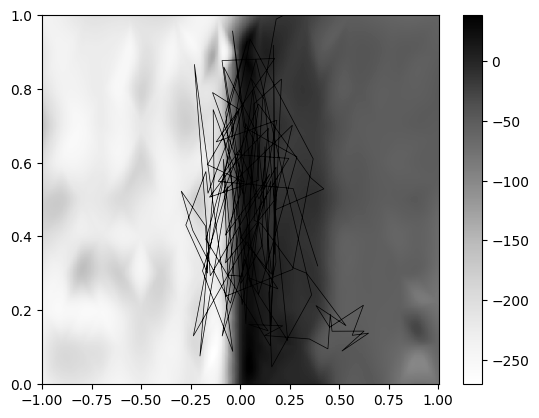

In [20]:
p1 = Path(verts,codes)

fig, ax = plt.subplots()
# fig, ax = plt.subplots()

im = ax.pcolormesh(x2, y2, z2, cmap='Greys')
# ax.set_xlim([-1,.9])
# ax.set_ylim([0,.9])
fig.colorbar(im, ax=ax)

# plt.show()
patch = patches.PathPatch(p1, fill=None, facecolor=None, lw=.5)
# ax.scatter(path['lr'],path['bs'],s=.1,c=path.index,cmap='',)
ax.add_patch(patch)
# # ax.add_patch()
# ax.set_xlim(-2, 2)
# ax.set_ylim(-2, 2)
plt.show()

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll
import matplotlib.path as mpath

In [22]:
def colorline(
    x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc


def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

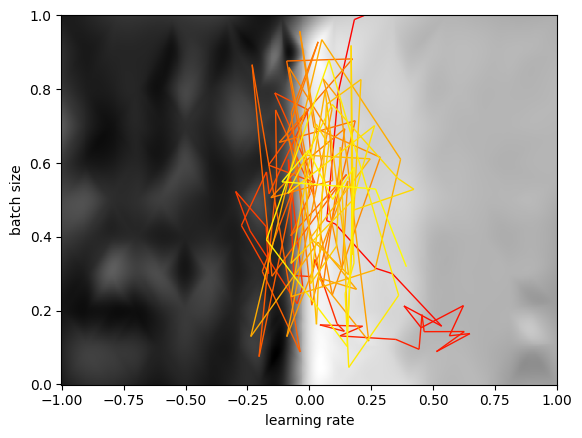

In [23]:
plt.pcolormesh(x2, y2, z2, cmap='gray')
plt.xlabel('learning rate')
plt.ylabel('batch size')
colorline(path['lr'], path['bs'], None, cmap='autumn', linewidth=1)
plt.show()

/tmp/ipykernel_637035/1259202797.py:1: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  path_reduced = path.groupby(lambda x : x//8,as_index=False).mean()


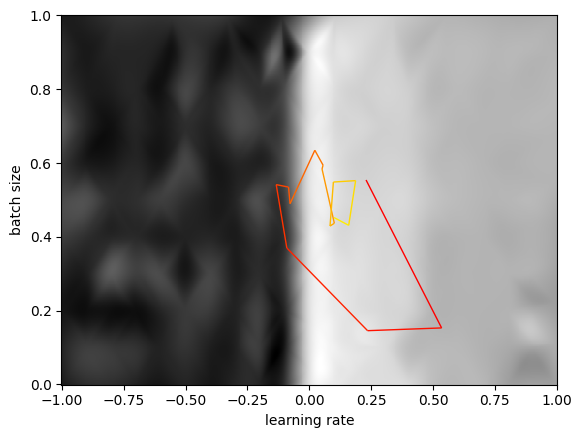

In [30]:
path_reduced = path.groupby(lambda x : x//8,as_index=False).mean()
pcm = plt.pcolormesh(x2, y2, z2, cmap='gray')
# plt.colorbar(pcm, label = 'episodic reward')
plt.xlabel('learning rate')
plt.ylabel('batch size')
line = colorline(path_reduced['lr'], path_reduced['bs'], None, cmap='autumn', linewidth=1)
# plt.colorbar(line, label = 'time', location = 'top')
plt.show()

In [25]:
path_reduced.head()

,lr,bs
0,0.229373,0.554056
1,0.534623,0.152985
2,0.235574,0.145532
3,-0.090683,0.369774
4,-0.133601,0.541453
